## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

* **Importing all the required libraries required for the project.**

In [121]:
import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline



* **Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**

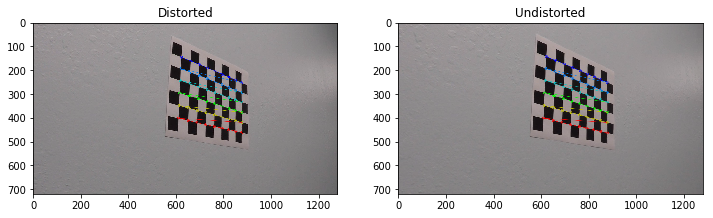

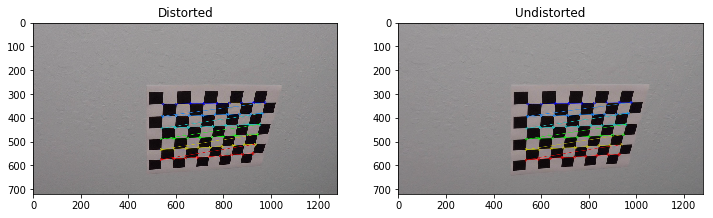

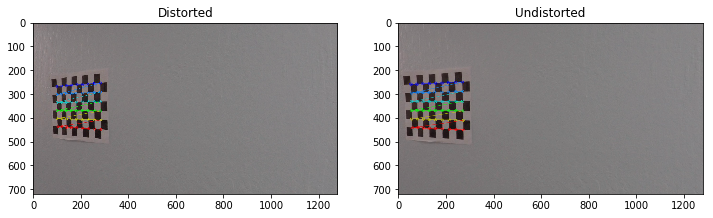

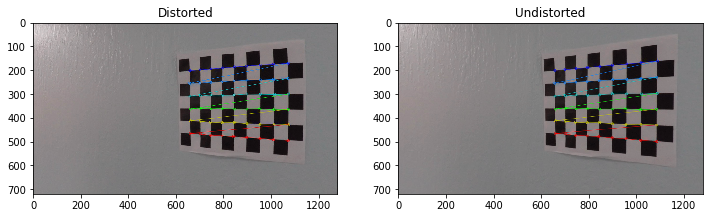

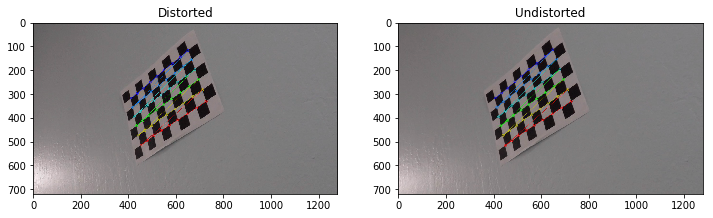

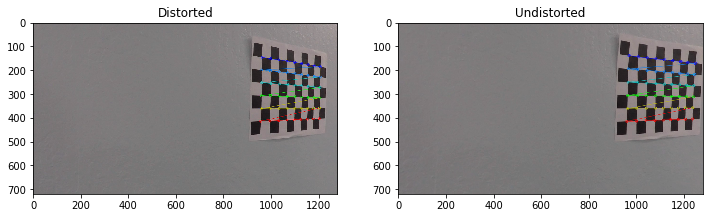

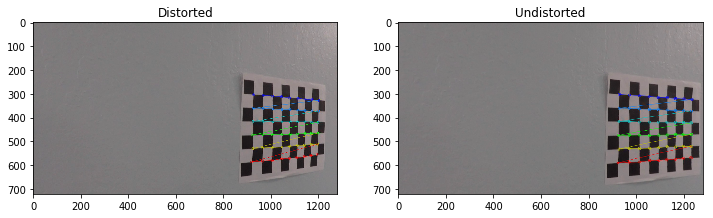

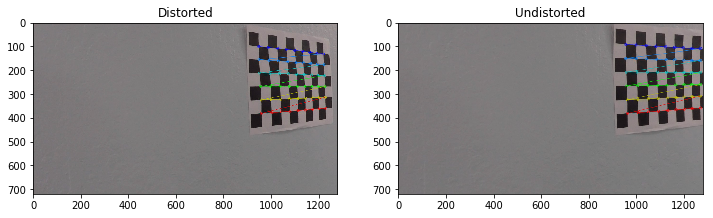

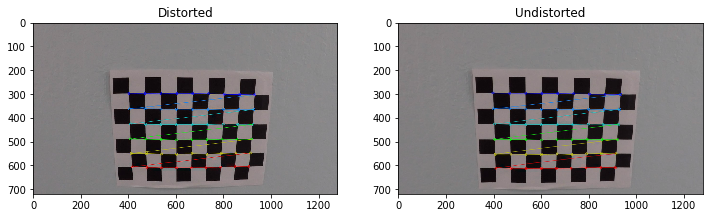

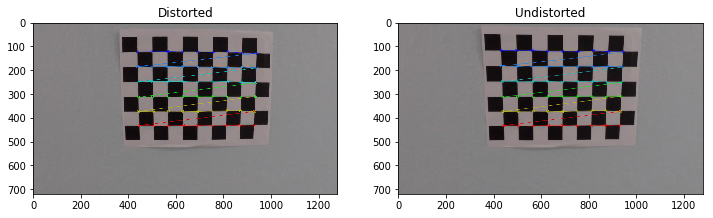

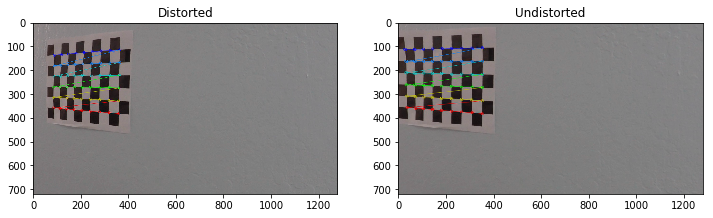

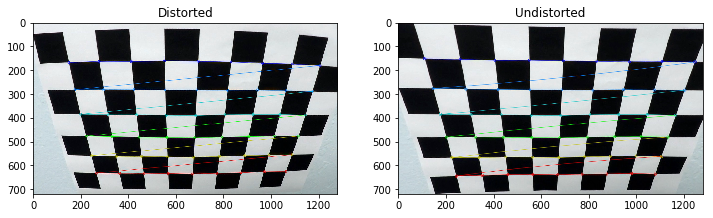

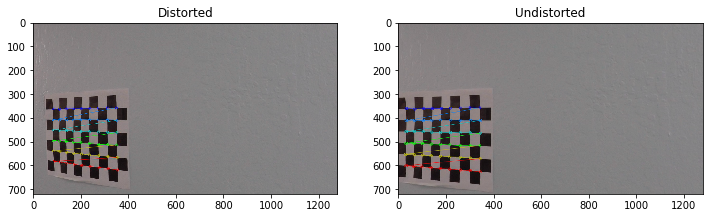

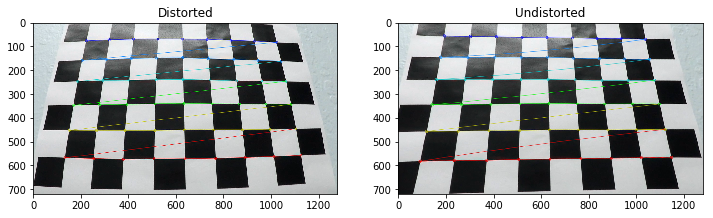

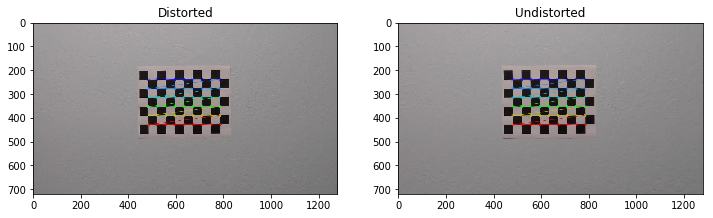

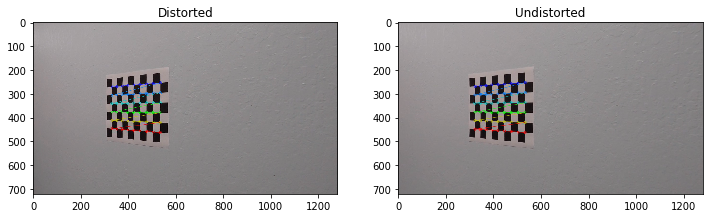

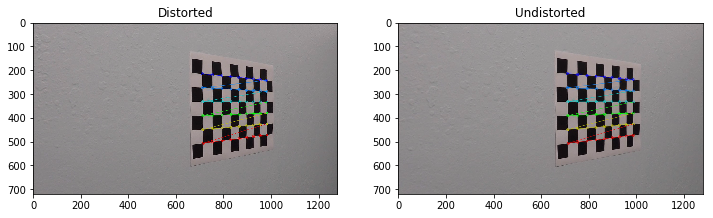

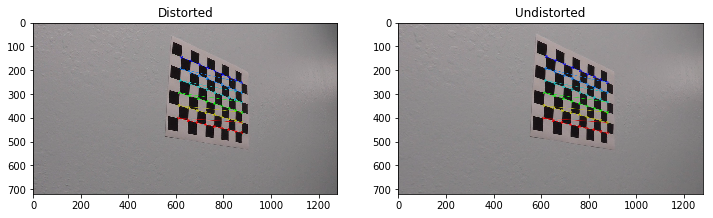

In [122]:
# # Make a list of calibration images
# images= glob.glob("./camera_cal/calibration*.jpg") # images contain the each image path in form of lists

'''Arrays to store all image points and object points from all the images,
(width, height, depth) in which depth will be 0 as its on plane surface.'''

# 3D points in real world space
object_points=[]

# 2D points in image plane
image_points=[]

'''np.zeros((6*9,3), np.float32)
6*9 represents width*height which gives us overall 54. So np.zero creates 54 lists and 3 represents the length of each list.
Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
'''
objp = np.zeros((6*9,3), np.float32) # 6,9 represents the total number of co-ordinates in y and x direction respectively.

'''np.mgrid[0:2,0:3]
Output : 
[[[0 0 0]
  [1 1 1]]

 [[0 1 2]
  [0 1 2]]] 
represents that it will create 2D array as we are passing two indexing dimensions
objp= np.mgrid[0:9,0:6]
print(objp.shape)
objp= np.mgrid[0:9,0:6].T
print(objp.shape)
objp=objp.reshape(-1,2) # -1 reshapes the list into single dimensional array
print(objp.shape)
Output :
(2, 9, 6)
(6, 9, 2)
(54, 2)
As we got to know np.mgrid[0:9,0:6].T.reshape(-1,2) shape is (54,2) and these values are stored in first two elements of objp,
so we used objp[:,:2]
This will give us the mesh grid points'''
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Iterate through the lists and get the corners of the images

#plt.figure(figsize = (16,32)) # To plot the (width, height) in inches

for image in os.listdir("camera_cal/"): # image will iterate through the list of the paths and consider each path one after another
    
    img = cv2.imread("camera_cal/" + image) # img stores the data of the image located in the path in the form of numpy array and reads the data of pixel in (BGR) format.
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # gray stres the graysacle img
    
    
    # Find the chessboard corners
    '''It need a grayscale image as input and number of corners in y and x directions respectively 
    and returns True or false and if the return is true it givesanother output which
    stores the value of the pixels where you were able to locate the corners(It gives the location of the corner in the image) '''
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None) # Prints the 9*6=54 corners (x,y) co-ordinates.
    
    # if all the corners are present in the gray(image) the image returns True
    if ret == True :
        object_points.append(objp) #objp are added to the object_points
        image_points.append(corners) # Corners are added to the image_points 
        
        # Draw the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret) # Returns the image after applying corners over it.
        
        #Saving the distorted images with corners down
        cv2.imwrite("output_images/Calibration_images_output/Distorted/"+image, img)
        
''' Calibrating camera : 
ret - True or False
mtx - Camera matrix that we need to transform 3D objects points to 2D image points
dist - distortion coefficient
rvecs - rotation vectors
trecs - transformation vectors
gray.shape[::-1] - will reverse the dimensions of the matrix.'''
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, gray.shape[::-1], None, None)

'''Undistorted image has comes as output.
img - Distorted image'''
dst = cv2.undistort(img, mtx, dist, None, mtx)         

# Printing the images after applying corners and distortion. 
fig, axes = plt.subplots(ncols=2, figsize=(12,8))
axes[0].imshow(img) # Distorted image 
axes[0].set_title('Distorted')
axes[1].imshow(dst) # Undistorted image
axes[1].set_title('Undistorted') 
        
        
# Saving and plotting the undistorted images to ./output_images/Calibration_images_output/ 
for i in os.listdir("output_images/Calibration_images_output/Distorted/"):
    #Extracting distorted image with corners drawn
    img = cv2.imread("output_images/Calibration_images_output/Distorted/" + i)    
    # Getting the final image after applying dist(distortion coefficient) and mtx(Camera matrix)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    # Saving the undistorted image with corners drawn
    cv2.imwrite("output_images/Calibration_images_output/Undistorted/"+i, dst)
    # Plotting the images
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8))
    ax1.imshow(img)
    ax1.set_title('Distorted')
    ax2.imshow(dst)
    ax2.set_title('Undistorted')
    
        
    
     



* **Apply a distortion correction to raw images.**

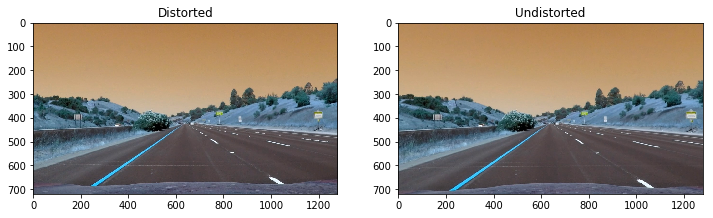

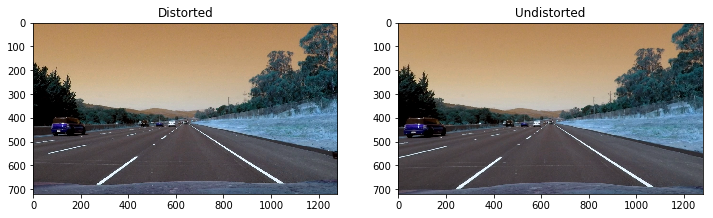

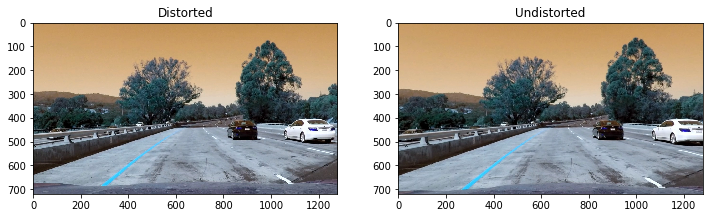

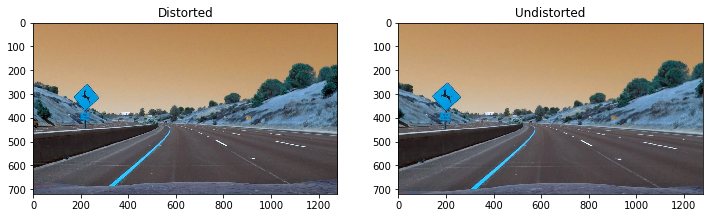

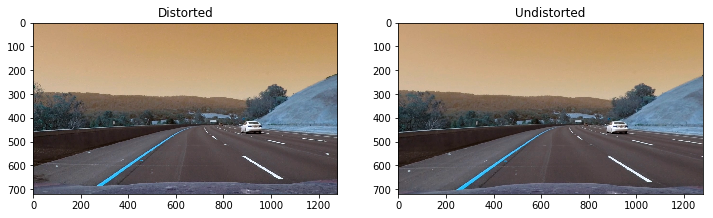

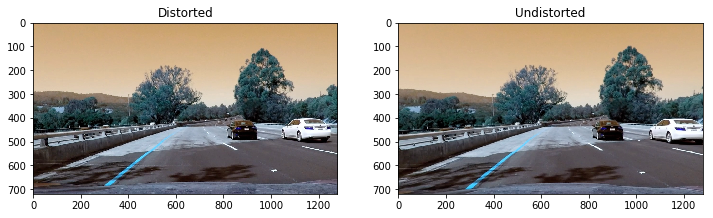

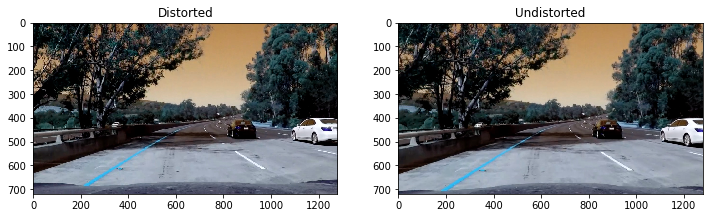

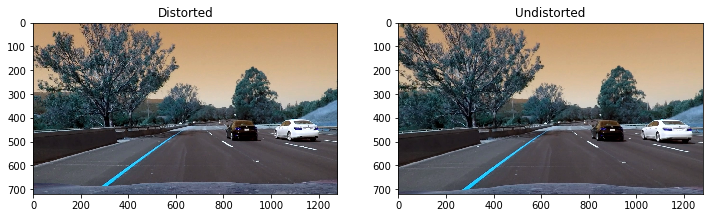

In [123]:
# Similar to tha above step.

# Saving and plotting the undistorted images to ./output_images/Calibration_images_output/ 
for i in os.listdir("test_images/"):
    #Extracting distorted image
    img = cv2.imread("test_images/" + i)    
    # Getting the final image after applying dist(distortion coefficient) and mtx(Camera matrix)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    # Saving the undistorted image
    cv2.imwrite("output_images/test_images/"+i, dst)
    # Plotting the images
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,8))
    ax1.imshow(img)
    ax1.set_title('Distorted')
    ax2.imshow(dst)
    ax2.set_title('Undistorted')

* **Use color transforms, gradients, etc., to create a thresholded binary image.**

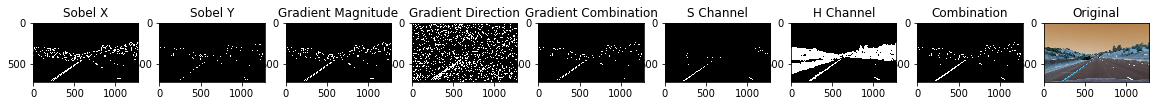

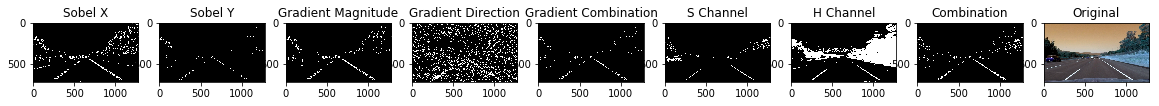

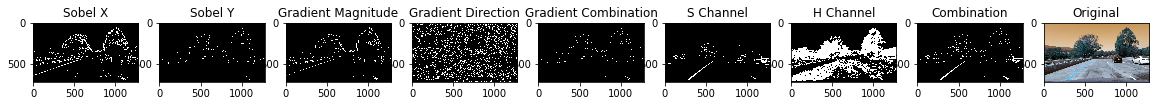

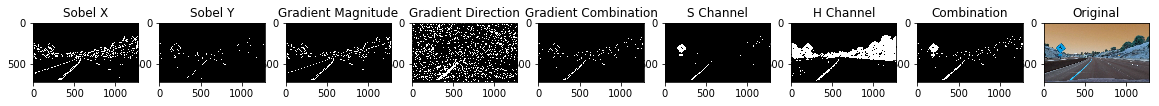

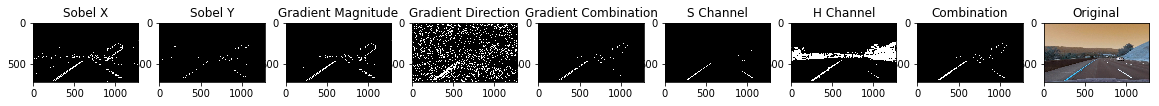

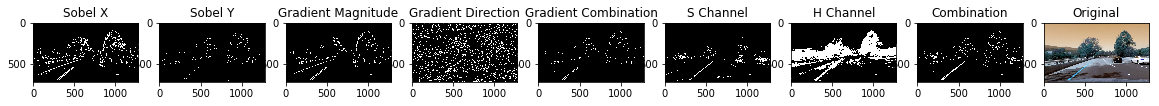

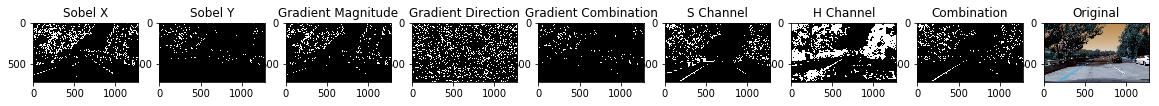

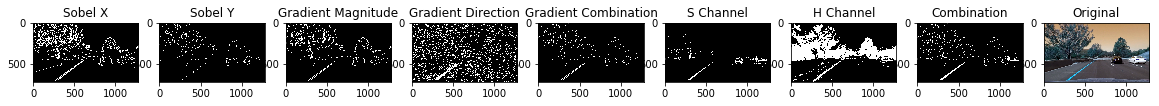

In [124]:
for i in os.listdir("output_images/test_images/"):
    #Extracting undistorted image
    img = cv2.imread("output_images/test_images/" + i)      


    # Convert to HLS color space and separate the S channel
    # Note: img is the undistorted image
    hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS) # Converting image from BGR to HLS channel
    s_channel = hls[:,:,2] # Selecting S channel because through trial and error we have seen it give us best results
    h_channel = hls[:,:,0] # Selecting H channel because through trial and error we have seen it give us best results
    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Sobel x and Sobel y
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 31) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx)) #Rescale to unit 8
    sobely = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in y
    abs_sobely = np.absolute(sobely) # Absolute y derivative to accentuate lines away from horizontal
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely)) #Rescale to unit 8

    # Threshold x gradient and y gradient
    thresh_min = 50
    thresh_max = 150
    sxbinary = np.zeros_like(scaled_sobelx) # Has similar dimensions to the scaled_sobelx but replcaes elements with 0.
    sxbinary[(scaled_sobelx >= 35) & (scaled_sobelx <= thresh_max)] = 1 # Making the points which fall in threshold to 1.
    sybinary = np.zeros_like(scaled_sobely)
    sybinary[(scaled_sobely >= thresh_min) & (scaled_sobely <= thresh_max)] = 1
    
    # Magnitude of gradient
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 31) # Took kernel size has large has possible because I want to avoid consider the edges which can be clearly seen
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1)  # Took the kernel size has small as possible so that it will be 3 so that it will neglect noises in x direction
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    scaled_sobelm = np.uint8(255*magnitude/np.max(magnitude)) 
    smbinary = np.zeros_like(magnitude) 
    smbinary[(scaled_sobelm >= thresh_min) & (scaled_sobelm <= thresh_max)] = 1 # Create a binary image of ones where threshold is met, zeros otherwise
    
    # Direction of the gradient
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 31) # By increasing the size of kenrel we were able to pick up particular points
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = 31) # So I have taken the kernel sixe = 31 which is maximum in this case.
    direction = np.arctan2(np.absolute(sobel_y), np.absolute(sobel_x))
    sdbinary =  np.zeros_like(direction)
    sdbinary[(direction >= 0.7) & (direction <= 1.0)] = 1
    
    # Compute the combination of Sobel X and Sobel Y or Magnitude and Direction
    sxymd_binary = np.zeros_like(sdbinary)
    sxymd_binary[((sxbinary == 1) & (sybinary == 1)) | ((smbinary == 1) & (sdbinary == 1))] = 1
    
    # Threshold color channel
    s_thresh_min = 150
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    # Threshold color channel
    h_thresh_min = 15
    h_thresh_max = 100
    h_binary = np.zeros_like(s_channel)
    h_binary[(h_channel >= h_thresh_min) & (h_channel <= h_thresh_max)] = 1

    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
    color_binary = np.dstack(( np.zeros_like(sxymd_binary), sxymd_binary, s_binary)) * 255
    
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxymd_binary)
    combined_binary[((s_binary == 1) & (h_binary == 1)) | (sxymd_binary == 1)] = 1
    
    # Saving the threshold binary image  
    cv2.imwrite("output_images/Threshold_binary_images/"+i, combined_binary*255)

    # Plotting thresholded images
    f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9, figsize=(20,10))
    ax1.set_title('Sobel X')
    ax1.imshow(sxbinary, cmap = 'gray')

    ax2.set_title('Sobel Y')
    ax2.imshow(sybinary, cmap = 'gray')
    
    ax3.set_title('Gradient Magnitude')
    ax3.imshow(smbinary, cmap = 'gray')
    
    ax4.set_title('Gradient Direction')
    ax4.imshow(sdbinary, cmap = 'gray')

    ax5.set_title('Gradient Combination')
    ax5.imshow(sxymd_binary, cmap = 'gray')
    
    ax6.set_title('S Channel')
    ax6.imshow(s_binary, cmap = 'gray')
    
    ax7.set_title('H Channel')
    ax7.imshow(h_binary, cmap = 'gray')
    
    ax8.set_title('Combination')
    ax8.imshow(combined_binary, cmap = 'gray')
    
    ax9.set_title('Original')
    ax9.imshow(img)

* **Apply a perspective transform to rectify binary image ("birds-eye view").**


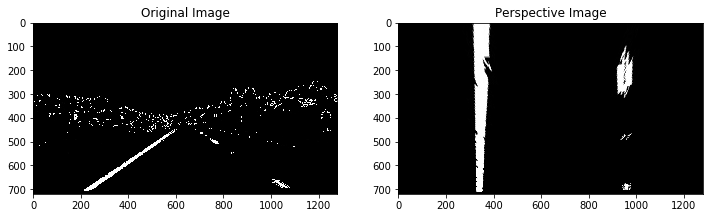

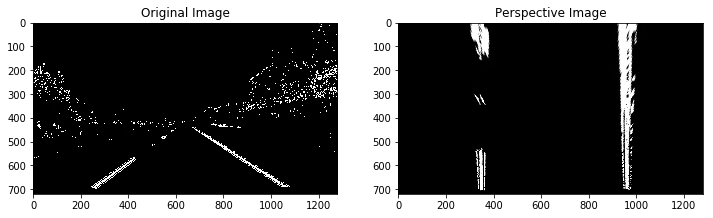

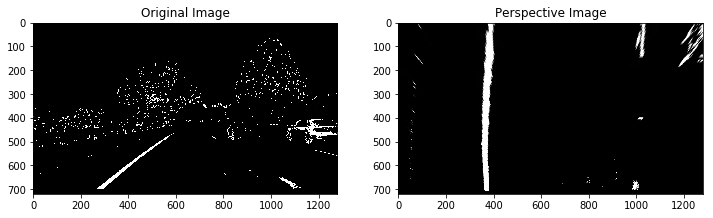

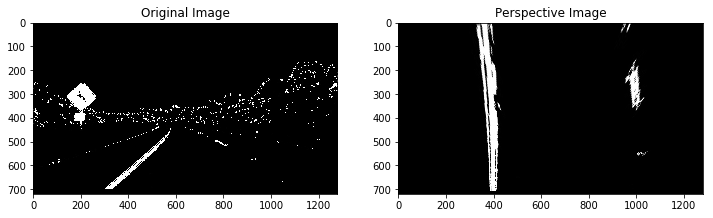

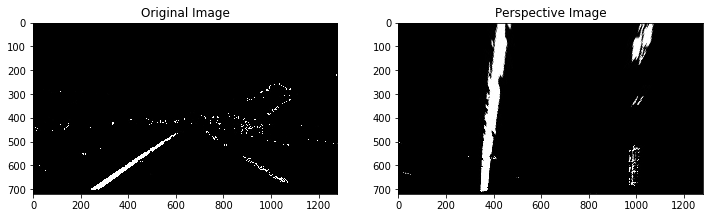

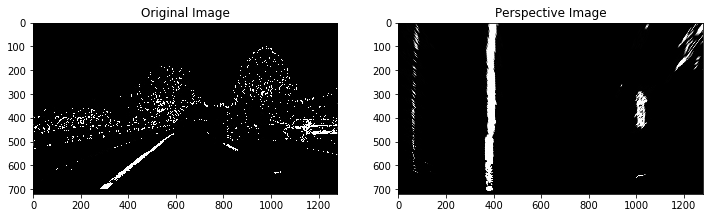

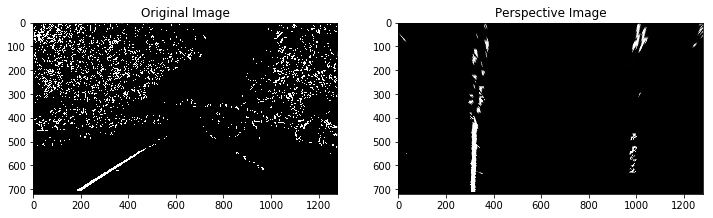

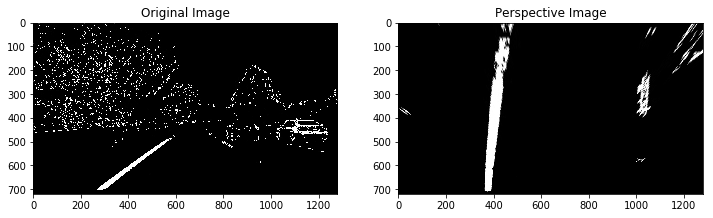

In [125]:
for i in os.listdir("output_images/Threshold_binary_images/"):
    #Extracting threshold binary image
    img = cv2.imread("output_images/Threshold_binary_images/" + i) 
    
    width = img.shape[1] # Width of the image
    height = img.shape[0] # Height of the image
    # Points selected on trial and error basis
    src = np.array([[(width*0.4, height*0.665),(width*0.6, height*0.665),(width, height),(0, height)]], dtype=np.float32)
    offset = 200
    dst = np.array([[offset, 0],[width-offset, 0],[width-offset, height], [offset, height]], dtype=np.float32)
    # Perspective transform
    M = cv2.getPerspectiveTransform(src, dst)
    # Inverse perspective transform
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Warped output
    warped = cv2.warpPerspective(img, M, (width, height), flags=cv2.INTER_LINEAR)
    
    # Saving the output
    cv2.imwrite("output_images/Perspective_images/"+i,warped)
    
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,8))
    ax1.set_title('Original Image')
    ax1.imshow(img)

    ax2.set_title('Perspective Image')
    ax2.imshow(warped)
    


* **Detect lane pixels and fit to find the lane boundary.**

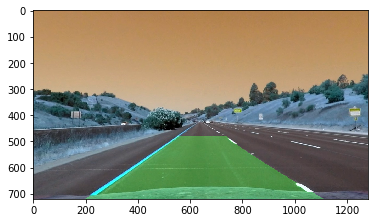

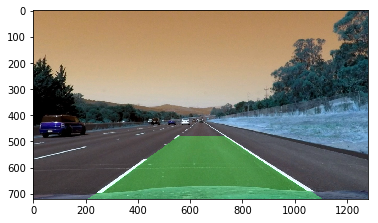

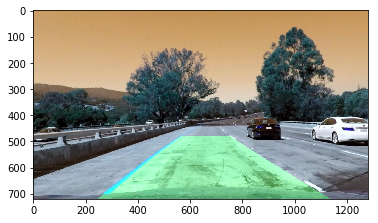

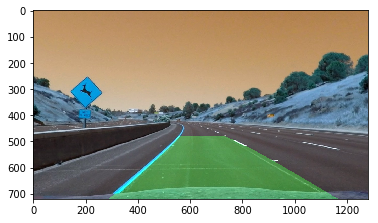

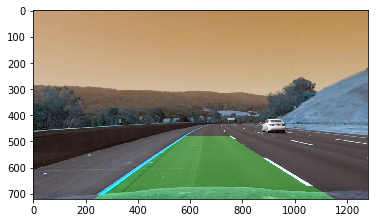

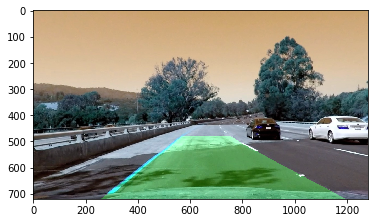

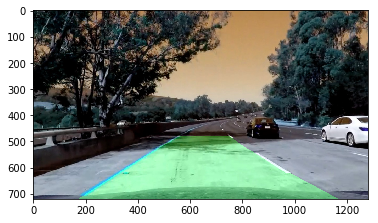

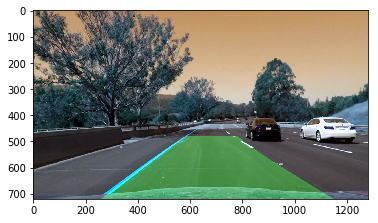

In [133]:
for i in os.listdir("output_images/Perspective_images/"):
    #Extracting threshold binary image
    binary_warped = cv2.imread("output_images/Perspective_images/" + i) 
    binary_warped = cv2.cvtColor(binary_warped, cv2.COLOR_BGR2GRAY)
    # Take a histogram of the bottom half of the image
    bottom_half_y = binary_warped.shape[0]/2
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)
    
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    

    
    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Calculate the Radius Of Curvature
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix, 2)
    
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(color_warp, Minv, (binary_warped.shape[1], binary_warped.shape[0])) 
    # Combine the result with the original image
    result = cv2.addWeighted(cv2.imread("output_images/test_images/"+i), 1, newwarp, 0.3, 0)
    plt.imshow(result)
    plt.show()



 
    

In [ ]:
process(image)

**Links**

np.zeros - https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html

np.mgrid - https://docs.scipy.org/doc/numpy/reference/generated/numpy.mgrid.html

np.T - https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html

np.reshape - https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

cv2.findChessboardCorners -   
http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.findChessboardCorners

cv2.drawChessboardCorners -http://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#cv2.drawChessboardCorners

plt.figure - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure

plt.subplot - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot

plt.subplots - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html

np.argmax - https://stackoverflow.com/questions/28697993/numpy-what-is-the-logic-of-the-argmin-and-argmax-functions

np.nonzero() - https://docs.scipy.org/doc/numpy/reference/generated/numpy.nonzero.html

np.dstack - https://stackoverflow.com/questions/25116595/understanding-numpys-dstack-function





           
           
   